In [1]:
# Install libraries (if not already installed)
!pip install pytrends


from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 1: Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

# Step 2: Choose keywords
keywords = ["Artificial Intelligence", "Electric Cars", "Climate Change", "Data Science"]

# Step 3: Build payload and fetch data (past 5 years)
pytrends.build_payload(kw_list=keywords, timeframe='today 5-y', geo='')

# Step 4: Interest over time
df_time = pytrends.interest_over_time()
print(df_time.head())

            Artificial Intelligence  Electric Cars  Climate Change  \
date                                                                 
2020-09-13                        1              1               4   
2020-09-20                        1              1               4   
2020-09-27                        1              1               3   
2020-10-04                        1              1               3   
2020-10-11                        1              1               3   

            Data Science  isPartial  
date                                 
2020-09-13             2      False  
2020-09-20             2      False  
2020-09-27             2      False  
2020-10-04             2      False  
2020-10-11             2      False  


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


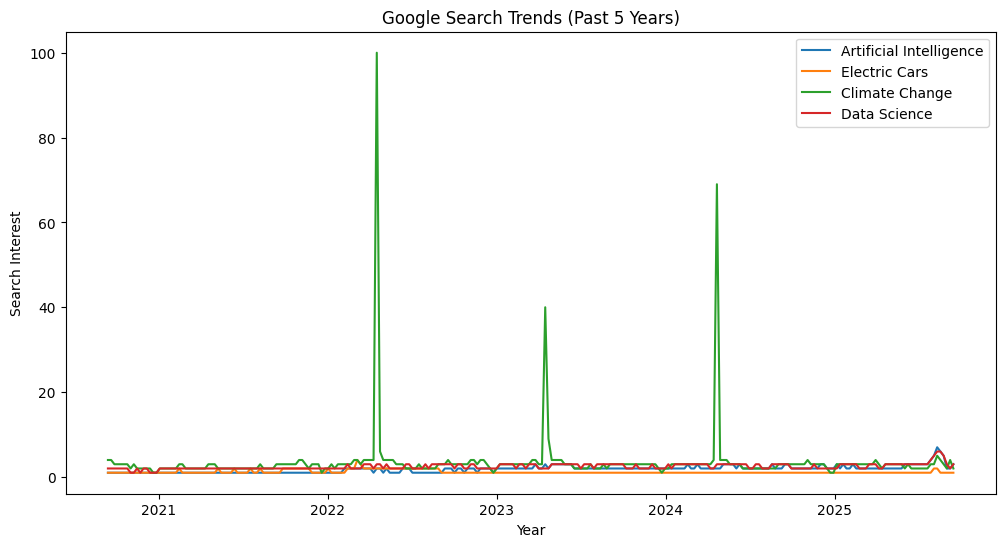

In [4]:
# Plot time-series
plt.figure(figsize=(12,6))
for col in keywords:
    plt.plot(df_time.index, df_time[col], label=col)

plt.title("Google Search Trends (Past 5 Years)")
plt.xlabel("Year")
plt.ylabel("Search Interest")
plt.legend()
plt.show()


In [5]:
# Step 5: Interest by region
df_region = pytrends.interest_by_region()
df_region = df_region.sort_values(by=keywords[0], ascending=False).head(10)
print(df_region)


              Artificial Intelligence  Electric Cars  Climate Change  \
geoName                                                                
Iran                               55              3              17   
Algeria                            46              4              21   
Brazil                             43              2              13   
Iraq                               42              6              39   
Türkiye                            40              5              27   
Indonesia                          36              2              30   
Saudi Arabia                       36              6              34   
Italy                              36              4              31   
St. Helena                         35             19              27   
China                              34              4              32   

              Data Science  
geoName                     
Iran                    25  
Algeria                 29  
Brazil             

/tmp/ipython-input-3879055180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_region.index, y=df_region[keywords[0]], palette="viridis")


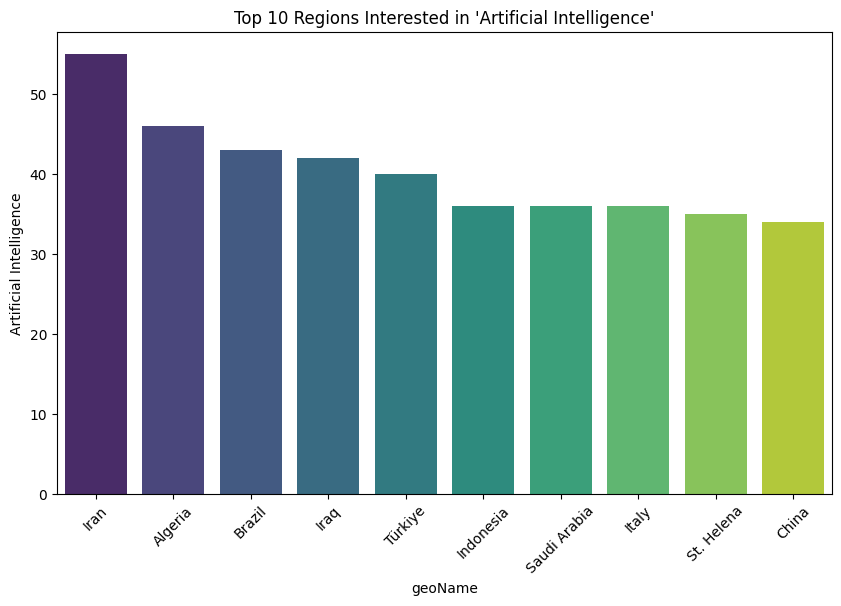

In [6]:
# Plot regional interest (top 10)
plt.figure(figsize=(10,6))
sns.barplot(x=df_region.index, y=df_region[keywords[0]], palette="viridis")
plt.xticks(rotation=45)
plt.title(f"Top 10 Regions Interested in '{keywords[0]}'")
plt.show()

In [7]:
# 📊 Automatic Insights from Google Trends Data

print("🔎 Key Insights from Google Trends Analysis\n")

# 1. Find the time of peak interest for each keyword
for kw in keywords:
    peak_date = df_time[kw].idxmax().strftime('%Y-%m')
    peak_value = df_time[kw].max()
    print(f"• '{kw}' peaked in {peak_date} with a search interest of {peak_value}.")

print("\n🌍 Regional Insights")
# 2. Top country for each keyword
for kw in keywords:
    top_region = pytrends.interest_by_region()[kw].idxmax()
    top_value = pytrends.interest_by_region()[kw].max()
    print(f"• '{kw}' has the highest interest in {top_region} (score: {top_value}).")

print("\n📈 Trend Comparisons")
# 3. Average interest comparison
avg_interest = df_time[keywords].mean().sort_values(ascending=False)
for kw, val in avg_interest.items():
    print(f"• On average, '{kw}' has a search interest of {round(val,1)}.")

# 4. Identify the most popular overall keyword
top_kw = avg_interest.idxmax()
print(f"\n🏆 Overall, '{top_kw}' is the most consistently searched topic.")


🔎 Key Insights from Google Trends Analysis

• 'Artificial Intelligence' peaked in 2025-08 with a search interest of 7.
• 'Electric Cars' peaked in 2022-03 with a search interest of 4.
• 'Climate Change' peaked in 2022-04 with a search interest of 100.
• 'Data Science' peaked in 2025-08 with a search interest of 6.

🌍 Regional Insights
• 'Artificial Intelligence' has the highest interest in Iran (score: 55).
• 'Electric Cars' has the highest interest in United Kingdom (score: 37).
• 'Climate Change' has the highest interest in Philippines (score: 78).
• 'Data Science' has the highest interest in Chile (score: 54).

📈 Trend Comparisons
• On average, 'Climate Change' has a search interest of 3.6.
• On average, 'Data Science' has a search interest of 2.5.
• On average, 'Artificial Intelligence' has a search interest of 1.8.
• On average, 'Electric Cars' has a search interest of 1.2.

🏆 Overall, 'Climate Change' is the most consistently searched topic.
